In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

In [30]:
data = pd.read_csv('./Traffic_Accident_2017.csv',encoding='euc-kr')
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


### 요일별 사고 건수 시각화

In [31]:
# 요일별 사고 건수를 세봅시다.
temp = data['요일'].value_counts()
temp

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

In [32]:
#월~일 로 정렬
t = temp[['월','화','수','목','금','토','일']]
t

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

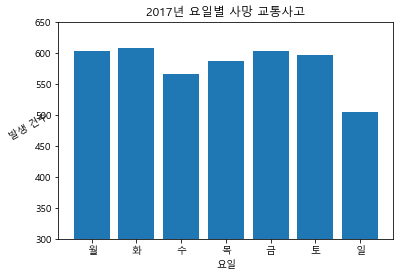

In [47]:
x = t.index
y = t.values
plt.bar(x,y)
plt.title('2017년 요일별 사망 교통사고')
plt.xlabel('요일')
plt.ylabel('발생 건수').set_rotation(30)
plt.ylim(300,650) 
plt.show()

### 차대 차 사건 중 죽거나 다친 사람이 많은 발생지 시,도를 알아보고 시각화해보자.

In [49]:
#'사고유형_대분류' 칼럼에서 '차대차'만 뽑아오기
car = data[data['사고유형_대분류']== '차대차']
car.head(2)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [52]:
# car에서 발생지시도를 기준으로 합계 구하기.
place = car[['사상자수','발생지시도']].groupby('발생지시도').sum()
place

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


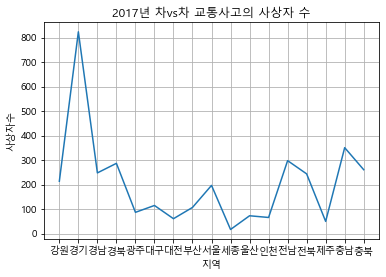

In [69]:
x= place.index
y= place.values
plt.plot(x,y)
plt.title('2017년 차vs차 교통사고의 사상자 수')
plt.xlabel('지역')
plt.ylabel('사상자수').set_rotation(90)
plt.grid()
plt.show()